
# Hotel Sales Analysis
### Created By : Kevin Cristoper Manurung

## Business Problem Understanding

**Context:**
  
Sebuah hotel ingin menyiapkan kamar untuk calon pelanggannya. Hotel ingin mengetahui pelanggan mana yang akan benar - benar menginap dan mana yang tidak.


Target :

0 : Tidak membatalkan booking

1 : Membatalkan Booking

**Problem Statement :**

Proses penyiapan fasilitas seperti kamar pada hotel memakan waktu dan sumber daya. Seandainya hotel menyiapkan semua fasilitas tetapi tidak digunakan maka akan sia - sia dan hotel mengalami kerugian dan beberapa fasilitas hotel kualitasnya akan menurun seiring berjalannya waktu, sehingga fasilitas harus disiapkan disaat diminta.

Perusahaan mengasumsikan biaya sebagai berikut
- Biaya yang dikeluarkan oleh Hotel untuk menyiapkan fasilitas kepada calon Customer (Kondisi False Negative): $50 / orang
- Biaya yang dikeluarkan Hotel untuk biaya marketing: $30 / orang
- Oleh karena biaya yang dikeluarkan akan lebih tinggi ketika pada saat kondisi False Negative maka hotel akan berusaha untuk menurunkan biaya yang telah dikeluarkan tersebut. Kemudian metrik yang dapat kita gunakan untuk melakukan pemilihan terhadap model Machine Learning yaitu Recall.

**Goals :**

Maka berdasarkan permasalahan tersebut, hotel ingin memiliki kemampuan untuk memprediksi faktor - faktor apa saja yang membuat pelanggan membatalkan booking, sehingga dapat memfokuskan penyiapan fasilitas pada pelanggan yang akan menginap dihotel tersebut.




**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan pengunjung yang jadi menginap di hotel dan yang tidak jadi(batal).

Kemudian kita akan membangun model klasifikasi yang akan membantu hotel untuk dapat memprediksi karakteristik pengunjung yang akan menginap atau tidak.

Type 1 error : False Positive  
Konsekuensi: Penurunan reputasi hotel dan kehilangan customer

Type 2 error : False Negative  
Konsekuensi: Kerugian sumber daya dalam penyiapan fasilitas

## Data Understanding

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| country | str | Negara Asal Pelanggan |
| market_segment | str | Segmen Pasar |
| previous_cancellations | int64 | Berapa kali melakukan pembatalan pemesanan |
| booking_changes | int64 | Berapa kali melakukan prubahan pemesanan |
| daposit_type | str | Tipe deposit |
| days_in_waiting_list | int64 | hari menunggu dalam waiting list |
| customer_type | str | Tipe pemesanan |
| reserved_room_type | str | Tipe kamar yang disewa |
| required_car_parking_space | int64 | Jumlah perminataan lahan parkir |
| total_of_special_request | int64 | Permintaan Tambahan |
| is_canceled(target) | int64 | Pembatalan pemesanan,0 – Tidak batal, 1 – Batal |

In [96]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# train test split

from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder
import category_encoders as ce

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# Ensemble Various Type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Ensemble Similar Type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier # Begging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score

# import library untuk oversampling
from imblearn.over_sampling import RandomOverSampler, SMOTE

# import library untuk undersampling
from imblearn.under_sampling import RandomUnderSampler, NearMiss



In [97]:
df=pd.read_csv('data_hotel_booking_demand.csv')


In [98]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [99]:
df.dtypes

country                        object
market_segment                 object
previous_cancellations          int64
booking_changes                 int64
deposit_type                   object
days_in_waiting_list            int64
customer_type                  object
reserved_room_type             object
required_car_parking_spaces     int64
total_of_special_requests       int64
is_canceled                     int64
dtype: object

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


cek unique

In [101]:
# Check Unique Values exist in dataset
# To show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

def unique_data(df):

    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique'] = [df[col].unique() for col in (df.columns)]
    return data_unique

unique_data(df)

,Columns,Unique Count,Unique
0,country,162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, BEL, JPN, DEU, ITA, CHE, GBR, AGO, SRB, COL, CHN, SWE, AUT, CIV, CZE, POL, USA, SGP, RUS, ROU, DNK, IND, MAR, PHL, ARG, ISL, ZAF, LBN, MOZ, TUR, BGD, MEX, CAF, NOR, FIN, UKR, EGY, ISR, nan, KOR, AZE, HUN, AUS, EST, CHL, SVN, PRY, ABW, ALB, LTU, ARE, HRV, SAU, NZL, LVA, ATA, KAZ, DZA, TWN, CRI, BIH, BGR, IRQ, OMN, VEN, IDN, GEO, MLT, IRN, BLR, URY, LBY, TUN, BEN, MYS, MWI, GRC, CYP, CPV, HKG, PRI, MKD, MUS, IMN, PAN, NGA, GLP, KHM, PER, QAT, SEN, MAC, ...]"
1,market_segment,8,"[Offline TA/TO, Online TA, Direct, Groups, Corporate, Complementary, Aviation, Undefined]"
2,previous_cancellations,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19, 5, 21]"
3,booking_changes,19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12, 14, 21, 16, 20, 15]"
4,deposit_type,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31, 122, 34, 57, 259, 50, 17, 32, 43, 75, 69, 44, 22, 113, 58, 38, 65, 48, 236, 176, 25, 108, 91, 19, 160, 68, 28, 63, 35, 42, 59, 24, 8, 183, 187, 21, 111, 56, 98, 101, 15, 16, 47, 93, 45, 14, 70, 10, 49, 178, 99, 60, 40, 85, 223, 6, 33, 391, 20, 1, 41, 147, 55, 80, 379, 150, 61, 330, 174, 107, 96, 18, 62, 13, 30, 120, 27, 207, 71, 2, 76, 125, 5, 9, 224, 53, 83, 84, 12, ...]"
6,customer_type,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,6,"[0, 2, 1, 3, 4, 5]"


In [102]:
df = df[df['market_segment'] != 'Undefined']

In [103]:
# summary
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83572.000000,83572.000000,83572.000000,83572.000000,83572.000000,83572.000000
mean,0.086799,0.220899,2.330589,0.063000,0.573206,0.368269
std,0.841015,0.648638,17.673155,0.246921,0.795167,0.482338
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


In [104]:
# Checking imbalance pada terget
(df['is_canceled'].value_counts()/len(df))*100


is_canceled
0    63.173072
1    36.826928
Name: count, dtype: float64

dari pengecekan, data tidak imbalance dan tidak dibalancing karena menurut domain knowledge tidak perlu.

# Data cleaning

In [105]:
# merubah format kolom
df.columns = [s.strip().replace('_',' ') for s in df.columns]

In [106]:
df.head()

,country,market segment,previous cancellations,booking changes,deposit type,days in waiting list,customer type,reserved room type,required car parking spaces,total of special requests,is canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [107]:
df.shape

(83572, 11)

In [108]:
# cek missing value
df.isna().sum()

country                        351
market segment                   0
previous cancellations           0
booking changes                  0
deposit type                     0
days in waiting list             0
customer type                    0
reserved room type               0
required car parking spaces      0
total of special requests        0
is canceled                      0
dtype: int64

In [109]:
df['country'].isna().sum()/len(df)*100

0.4199971282247643

In [110]:
df.isna().sum()

country                        351
market segment                   0
previous cancellations           0
booking changes                  0
deposit type                     0
days in waiting list             0
customer type                    0
reserved room type               0
required car parking spaces      0
total of special requests        0
is canceled                      0
dtype: int64

**jumlah nan 0,4% dari keseluruhan data. Terdapat missing value sebanyak 351 pada kolom country.
Karena jumlah missing value dibawah 1% maka di drop.**

In [111]:
df=df.dropna()

In [112]:
df.isna().sum()

country                        0
market segment                 0
previous cancellations         0
booking changes                0
deposit type                   0
days in waiting list           0
customer type                  0
reserved room type             0
required car parking spaces    0
total of special requests      0
is canceled                    0
dtype: int64

In [113]:
df.shape

(83221, 11)

In [114]:
# Cek Duplicate
df.duplicated().sum()

73138

## Drop Duplicated


In [115]:
df = df.drop_duplicates()

In [116]:
# Cek Duplicate
df.duplicated().sum()

0

In [117]:
df.shape

(10083, 11)

In [118]:
df['is canceled'].value_counts()

is canceled
0    7688
1    2395
Name: count, dtype: int64

In [119]:
df.head()

,country,market segment,previous cancellations,booking changes,deposit type,days in waiting list,customer type,reserved room type,required car parking spaces,total of special requests,is canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


## **Exploratory Data Analysis (EDA)**

In [120]:
# Menampilkan summary statistics
df.describe()

,previous cancellations,booking changes,days in waiting list,required car parking spaces,total of special requests,is canceled
count,10083.000000,10083.000000,10083.000000,10083.000000,10083.000000,10083.000000
mean,0.088962,0.798274,3.602301,0.165427,0.941188,0.237529
std,0.832369,1.297369,22.323858,0.392610,1.038064,0.425590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


In [121]:
df.describe(include='object')

,country,market segment,deposit type,customer type,reserved room type
count,10083,10083,10083,10083,10083
unique,162,7,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,1992,4924,9842,6813,4562


In [122]:
# Mengetahui nilai korelasi dari setiap kolom numerik
df.corr(numeric_only=True)

,previous cancellations,booking changes,days in waiting list,required car parking spaces,total of special requests,is canceled
previous cancellations,1.000000,-0.045378,-0.005291,-0.021667,-0.018280,0.076700
booking changes,-0.045378,1.000000,-0.030747,-0.012759,-0.016028,-0.072730
days in waiting list,-0.005291,-0.030747,1.000000,-0.054328,-0.120820,0.032222
required car parking spaces,-0.021667,-0.012759,-0.054328,1.000000,0.029715,-0.235186
total of special requests,-0.018280,-0.016028,-0.120820,0.029715,1.000000,-0.073223
is canceled,0.076700,-0.072730,0.032222,-0.235186,-0.073223,1.000000


Text(0.5, 0, 'Is Canceled Status')

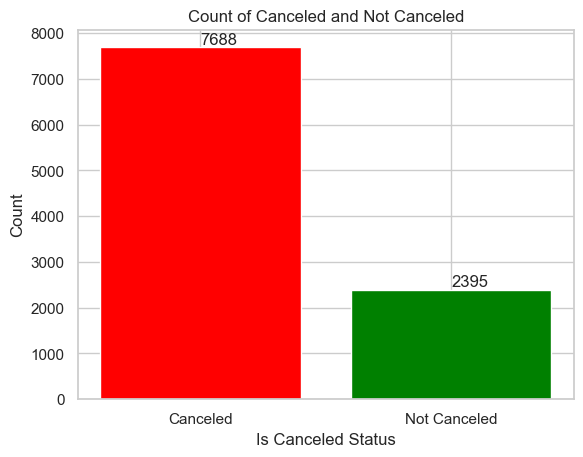

In [123]:
# Updated categories and counts
categories = ['Canceled', 'Not Canceled']
counts = df['is canceled'].value_counts()

# Generating the updated bar chart
fig, ax = plt.subplots()
bars = ax.bar(categories, counts, color=['red', 'green'])

# Adding the count above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va: vertical alignment

# Setting the title and labels
ax.set_title('Count of Canceled and Not Canceled')
ax.set_ylabel('Count')
ax.set_xlabel('Is Canceled Status')

## **Define X and y**

In [124]:
# Define X y
X = df.drop(columns='is canceled')
y = df['is canceled']

## **Data Splitting**


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,
                 y,
                 test_size=0.2,
                 random_state=0,
                 stratify=y)

## **Data Preprocessing**

In [126]:
df.describe(include='object')

,country,market segment,deposit type,customer type,reserved room type
count,10083,10083,10083,10083,10083
unique,162,7,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,1992,4924,9842,6813,4562


In [127]:
df.head()

,country,market segment,previous cancellations,booking changes,deposit type,days in waiting list,customer type,reserved room type,required car parking spaces,total of special requests,is canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [128]:
transformer = ColumnTransformer([
    ('onehot_encoder', OneHotEncoder(), ['market segment', 'deposit type', 'customer type']),
    ('binary_encoder', BinaryEncoder(), ['country','reserved room type']),
    ('fobust_scaling', RobustScaler(), ['previous cancellations', 'booking changes', 'days in waiting list', 'required car parking spaces', 'total of special requests'])
], remainder='passthrough')

In [129]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot_encoder', OneHotEncoder(),
                                 ['market segment', 'deposit type',
                                  'customer type']),
                                ('binary_encoder', BinaryEncoder(),
                                 ['country', 'reserved room type']),
                                ('fobust_scaling', RobustScaler(),
                                 ['previous cancellations', 'booking changes',
                                  'days in waiting list',
                                  'required car parking spaces',
                                  'total of special requests'])])

In [130]:
testing = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
testing.sample()

,onehot_encoder__market segment_Aviation,onehot_encoder__market segment_Complementary,onehot_encoder__market segment_Corporate,onehot_encoder__market segment_Direct,onehot_encoder__market segment_Groups,onehot_encoder__market segment_Offline TA/TO,onehot_encoder__market segment_Online TA,onehot_encoder__deposit type_No Deposit,onehot_encoder__deposit type_Non Refund,onehot_encoder__deposit type_Refundable,onehot_encoder__customer type_Contract,onehot_encoder__customer type_Group,onehot_encoder__customer type_Transient,onehot_encoder__customer type_Transient-Party,binary_encoder__country_0,binary_encoder__country_1,binary_encoder__country_2,binary_encoder__country_3,binary_encoder__country_4,binary_encoder__country_5,binary_encoder__country_6,binary_encoder__country_7,binary_encoder__reserved room type_0,binary_encoder__reserved room type_1,binary_encoder__reserved room type_2,binary_encoder__reserved room type_3,fobust_scaling__previous cancellations,fobust_scaling__booking changes,fobust_scaling__days in waiting list,fobust_scaling__required car parking spaces,fobust_scaling__total of special requests
997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.5


## **Cross Validation**

In [131]:
# Bagging
bagging = BaggingClassifier(random_state=0, estimator = KNeighborsClassifier())

# Random Forest
rf = RandomForestClassifier(random_state=0)

# Ada Boosting
adaboost = AdaBoostClassifier(random_state=0)

# Gradient Boosting
gboost = GradientBoostingClassifier(random_state=0)

# define algo
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)

In [132]:
# Voting Classifer
voting = VotingClassifier([
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree)
])

# Stacking Classifier
stacking = StackingClassifier(estimators= [
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree)],
    final_estimator= logreg)

In [133]:
# Cross Validation
models = [logreg, knn, tree, voting, stacking, bagging, rf, adaboost, gboost]
list_all_recall = []
list_mean_recall = []
list_std_recall = []


for i in models:
# pipe_model
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', i)
    ])
    cv_score = cross_val_score(
        estimator=pipe_model,
        X = X_train,
        y = y_train,
        cv = 5,
        scoring ='recall'
    )
    list_all_recall.append(cv_score.round(2))
    list_mean_recall.append(cv_score.mean())
    list_std_recall.append(cv_score.std())

/Users/kevinmanurung/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/kevinmanurung/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kevinmanurung/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [134]:
df_cv = pd.DataFrame()
df_cv['algo'] = models
df_cv['all_recall']= list_all_recall
df_cv['mean_recall'] = list_mean_recall
df_cv['std_recall'] = list_std_recall

df_cv.sort_values(by='mean_recall',ascending=False)

,algo,all_recall,mean_recall,std_recall
4,"StackingClassifier(estimators=[('clf1', LogisticRegression(random_state=0)),\n ('clf2', KNeighborsClassifier()),\n ('clf3',\n DecisionTreeClassifier(random_state=0))],\n final_estimator=LogisticRegression(random_state=0))","[0.35, 0.34, 0.32, 0.31, 0.34]",0.331412,0.014106
1,KNeighborsClassifier(),"[0.33, 0.31, 0.33, 0.32, 0.3]",0.316278,0.011661
7,AdaBoostClassifier(random_state=0),"[0.34, 0.31, 0.26, 0.29, 0.34]",0.307919,0.028523
6,RandomForestClassifier(random_state=0),"[0.29, 0.3, 0.29, 0.29, 0.3]",0.292801,0.004689
2,DecisionTreeClassifier(random_state=0),"[0.26, 0.32, 0.28, 0.28, 0.3]",0.289681,0.020485
5,"BaggingClassifier(estimator=KNeighborsClassifier(), random_state=0)","[0.28, 0.31, 0.29, 0.31, 0.26]",0.287062,0.019894
8,GradientBoostingClassifier(random_state=0),"[0.26, 0.29, 0.24, 0.28, 0.3]",0.274536,0.022126
0,LogisticRegression(random_state=0),"[0.29, 0.27, 0.23, 0.23, 0.29]",0.264077,0.025809
3,"VotingClassifier(estimators=[('clf1', LogisticRegression(random_state=0)),\n ('clf2', KNeighborsClassifier()),\n ('clf3', DecisionTreeClassifier(random_state=0))])","[0.25, 0.25, 0.25, 0.25, 0.25]",0.251044,0.001138


## **Hyperparameter Tuning**

In [135]:
smote = SMOTE(random_state=0, sampling_strategy='minority')
nearmiss = NearMiss(sampling_strategy='majority')
randomover = RandomOverSampler(random_state=0)
randomunder = RandomUnderSampler(random_state=0)

In [136]:
# hyperparam
hyperparam = {
    'modeling__final_estimator__fit_intercept': [True, False],
    'modeling__stack_method': ['auto', 'predict_proba'],
    'modeling__final_estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Adjust with appropriate values for 'C'
}


# pipeline prep dan modeling
pipe_model = Pipeline([
    ('prep', transformer),
    ('modeling', stacking)
])

# Tuning
random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    n_iter=100,
    error_score='raise'
)

In [137]:
random_search.fit(X_train, y_train)

/Users/kevinmanurung/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


/Users/kevinmanurung/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kevinmanurung/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot_encoder',
                                                                               OneHotEncoder(),
                                                                               ['market '
                                                                                'segment',
                                                                                'deposit '
                                                                                'type',
                                                                                'customer '
                                                                                'type']),
                                                                              ('binary_encoder',
                                                                               BinaryEncoder(),
                                                                               ['country',
                                                                                'reserved '
                                                                                'room '
                                                                                'type']),
                                                                              ('fobust_scaling',
                                                                               RobustScaler(),
                                                                               ['previous '
                                                                                'cancellations...
                                                                              KNeighborsClassifier()),
                                                                             ('clf3',
                                                                              DecisionTreeClassifier(random_state=0))],
                                                                 final_estimator=LogisticRegression(random_state=0)))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'modeling__final_estimator__C': [0.001,
                                                                         0.01,
                                                                         0.1, 1,
                                                                         10,
                                                                         100],
                                        'modeling__final_estimator__fit_intercept': [True,
                                                                                     False],
                                        'modeling__stack_method': ['auto',
                                                                   'predict_proba']},
                   scoring='recall')

In [138]:
random_search.best_params_

{'modeling__stack_method': 'auto',
 'modeling__final_estimator__fit_intercept': True,
 'modeling__final_estimator__C': 100}

In [139]:
random_search.best_estimator_

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot_encoder',
                                                  OneHotEncoder(),
                                                  ['market segment',
                                                   'deposit type',
                                                   'customer type']),
                                                 ('binary_encoder',
                                                  BinaryEncoder(),
                                                  ['country',
                                                   'reserved room type']),
                                                 ('fobust_scaling',
                                                  RobustScaler(),
                                                  ['previous cancellations',
                                                   'booking changes',
                                                   'days in waiting list',
                                                   'required car parking '
                                                   'spaces',
                                                   'total of special '
                                                   'requests'])])),
                ('modeling',
                 StackingClassifier(estimators=[('clf1',
                                                 LogisticRegression(random_state=0)),
                                                ('clf2',
                                                 KNeighborsClassifier()),
                                                ('clf3',
                                                 DecisionTreeClassifier(random_state=0))],
                                    final_estimator=LogisticRegression(C=100,
                                                                       random_state=0)))])

## **Akurasi Model Sebelum dan Sesudah Tuning**

In [140]:
# Model sebelum Tuning
model = Pipeline([
    ("preprocessing", transformer),
    ("model", stacking)
])

model.fit(X_train, y_train)
y_pred_before = model.predict(X_test)

# Calculate F2 score
y_pred_before = model.predict(X_test)
recall_score(y_test, y_pred_before)

/Users/kevinmanurung/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kevinmanurung/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

0.3235908141962422

In [141]:
# Model setelah Tuning
# define model
best_model = random_search.best_estimator_

# fitting -> Train only
best_model.fit(X_train, y_train)

# predict -> X_test
y_pred_after = best_model.predict(X_test)

# metrics accuracy
recall_score(y_test, y_pred_after)

/Users/kevinmanurung/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kevinmanurung/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

0.3298538622129436

In [142]:
print("Nilai akurasi model sebelum dilakukan Tuning :", recall_score(y_test, y_pred_before))
print("Nilai akurasi model setelah dilakukan Tuning :", recall_score(y_test, y_pred_after))

Nilai akurasi model sebelum dilakukan Tuning : 0.3235908141962422
Nilai akurasi model setelah dilakukan Tuning : 0.3298538622129436


## **Mengetahui Threshold Terbaik**

In [143]:
# Model dengan Threshold terbaik
best_model =  random_search.best_estimator_

# Use the best model to make predictions on the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Set your desired threshold
threshold = 0.5

# Apply the threshold to get binary predictions
y_pred = (y_pred_proba > threshold).astype(int)

In [144]:

# Use the best model to make predictions on the test set
y_pred = best_model.predict(X_test)

# Create a DataFrame with different threshold values and their corresponding precision scores
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
results = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba > threshold).astype(int)
    recall = recall_score(y_test, y_pred_threshold)
    results.append({'Threshold': threshold, 'recall': recall})

recall_df = pd.DataFrame(results)

# Sort the DataFrame by precision in descending order
sorted_recall_df = recall_df.sort_values(by='recall', ascending=False)

# Display the sorted DataFrame
sorted_recall_df

,Threshold,recall
0,0.1,0.945720
1,0.2,0.780793
2,0.3,0.628392
3,0.4,0.475992
4,0.5,0.329854
5,0.6,0.256785
6,0.7,0.173278
7,0.8,0.085595
8,0.9,0.045929


In [145]:
# Get the best threshold and its corresponding precision score
best_threshold_row = sorted_recall_df.iloc[0]
best_threshold = best_threshold_row['Threshold']
best_recall = best_threshold_row['recall']

# Print or use the best threshold and precision score
print("Best Threshold:", best_threshold)
print("Corresponding recall:", best_recall)


Best Threshold: 0.1
Corresponding recall: 0.9457202505219207


## **Confusion Matrix**

In [146]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_before are already defined
cf_before = confusion_matrix(y_test, y_pred_before)
print(cf_before)

[[1455   83]
 [ 324  155]]


In [147]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

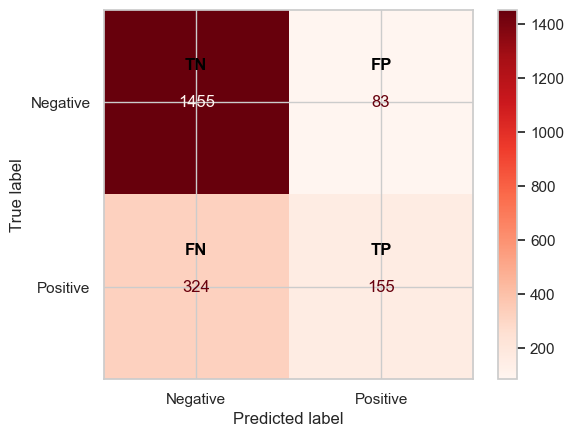

In [148]:
# Sebelum Tuning
# Display confusion matrix without numeric values
disp = ConfusionMatrixDisplay(confusion_matrix=cf_before, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Reds', values_format='')

# Add abbreviations above the cells with higher positioning
for i in range(2):
    for j in range(2):
        cell_value = disp.confusion_matrix[i, j]
        if i == 0 and j == 0:
            plt.text(j, i - 0.2, 'TN', ha='center', va='center', color='black', fontweight='bold')
        elif i == 0 and j == 1:
            plt.text(j, i - 0.2, 'FP', ha='center', va='center', color='black', fontweight='bold')
        elif i == 1 and j == 0:
            plt.text(j, i - 0.2, 'FN', ha='center', va='center', color='black', fontweight='bold')
        elif i == 1 and j == 1:
            plt.text(j, i - 0.2, 'TP', ha='center', va='center', color='black', fontweight='bold')

# Show the plot
plt.show()

**Confusion Metrix setelah Tuning**

In [149]:
cf_after = confusion_matrix(y_test,y_pred_after)
cf_after

array([[1451,   87],
       [ 321,  158]])

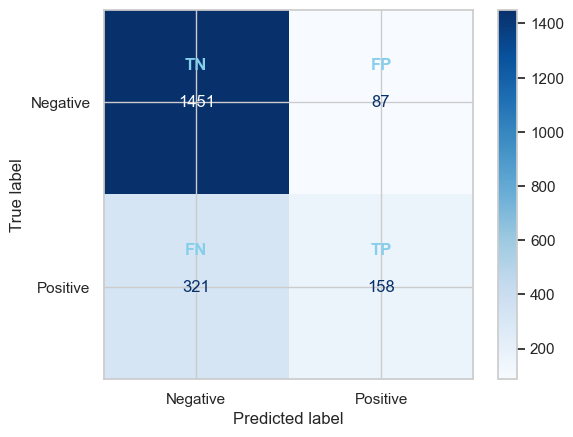

In [150]:
# Display confusion matrix without numeric values
disp = ConfusionMatrixDisplay(confusion_matrix=cf_after, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='')

# Add abbreviations above the cells with higher positioning
for i in range(2):
    for j in range(2):
        cell_value = disp.confusion_matrix[i, j]
        if i == 0 and j == 0:
            plt.text(j, i - 0.2, 'TN', ha='center', va='center', color='skyblue', fontweight='bold')
        elif i == 0 and j == 1:
            plt.text(j, i - 0.2, 'FP', ha='center', va='center', color='skyblue', fontweight='bold')
        elif i == 1 and j == 0:
            plt.text(j, i - 0.2, 'FN', ha='center', va='center', color='skyblue', fontweight='bold')
        elif i == 1 and j == 1:
            plt.text(j, i - 0.2, 'TP', ha='center', va='center', color='skyblue', fontweight='bold')

# Show the plot
plt.show()

**Confusion setelah Tuning dengan Threshold terbaik**

In [151]:
from sklearn.metrics import confusion_matrix, classification_report

# 1. Make Predictions
y_pred_prob = random_search.predict_proba(X_test)[:, 1]

# 2. Apply Threshold
threshold = 0.1
y_pred = (y_pred_prob >= threshold).astype(int)

# 3. Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion Matrix
cm

array([[702, 836],
       [ 26, 453]])

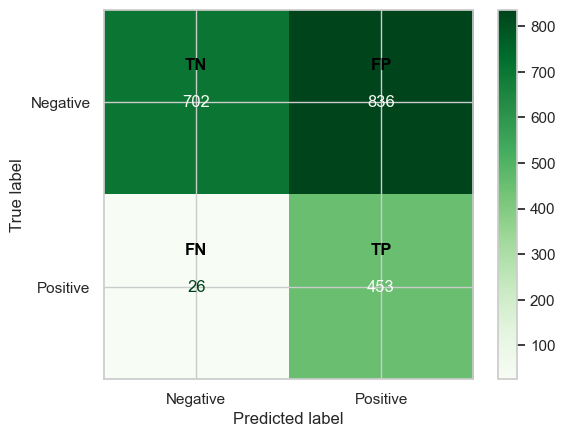

In [152]:
# Display confusion matrix without numeric values
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Greens', values_format='')

# Add abbreviations above the cells with higher positioning
for i in range(2):
    for j in range(2):
        cell_value = disp.confusion_matrix[i, j]
        if i == 0 and j == 0:
            plt.text(j, i - 0.2, 'TN', ha='center', va='center', color='black', fontweight='bold')
        elif i == 0 and j == 1:
            plt.text(j, i - 0.2, 'FP', ha='center', va='center', color='black', fontweight='bold')
        elif i == 1 and j == 0:
            plt.text(j, i - 0.2, 'FN', ha='center', va='center', color='black', fontweight='bold')
        elif i == 1 and j == 1:
            plt.text(j, i - 0.2, 'TP', ha='center', va='center', color='black', fontweight='bold')

# Show the plot
plt.show()

### **Kesimpulan**
Biaya Pengeluaran Hotel Sebelum Menggunakan Pemodelan Machine Learning (ML)

- Permasalahan utama yang dihadapi hotel adalah bagaimana cara mengelola sumber daya dan meminimalisir pengeluaran ketika terjadi kondisi di mana tamu yang sebelumnya diprediksi akan menginap ternyata membatalkan pemesanannya. Situasi ini mengakibatkan hotel telah mengeluarkan biaya untuk menyiapkan kamar dan fasilitas lainnya untuk tamu yang pada akhirnya tidak jadi menginap.
- Jika dilihat dari nilai FN (False Negative) pada Confusion Matrix sebelum menggunakan modeling maka terdapat sejumlah 324 calon Customer yang diprediksi tidak akan membatalkan booking namun aktualnya menggagalkan booking/ salah prediksi. Maka biaya yang telah dikeluarkan oleh Hotel pada saat sedang memprediksi tersebut adalah sebesar 324 x $50 = $ 16.200

Biaya Pengeluaran Hotel setelah Menggunakan Pemodelan Machine Learning (ML)

- Setelah implementasi model ML yang optimal dengan menggunakan stacking method, biaya yang dikeluarkan hotel untuk kasus-kasus salah prediksi dapat diminimalisir. Model ML membantu hotel untuk lebih akurat memprediksi pemesanan mana yang akan benar-benar terjadi dan mana yang kemungkinan besar akan dibatalkan.
- Jika dilihat dari nilai FN pada Confusion Matrix setelah menggunakan modeling + Threshold terbaik maka jumlah calon Customer yang diprediksi tidak akan membatalkan booking namun aktualnya menggagalkan booking menjadi turun drastis yaitu hanya 26 calon customer saja jika dibandingkan jumlah calon Customer sebelumnya dilakukan modeling yaitu sejumlah 321 calon Customer. Maka biaya yang dikeluarkan Hotel pada saat salah prediksi setelah dilakukan modeling adalah hanya sebesar 26 x $50 = $1.300 saja.

## **Feature Importance**

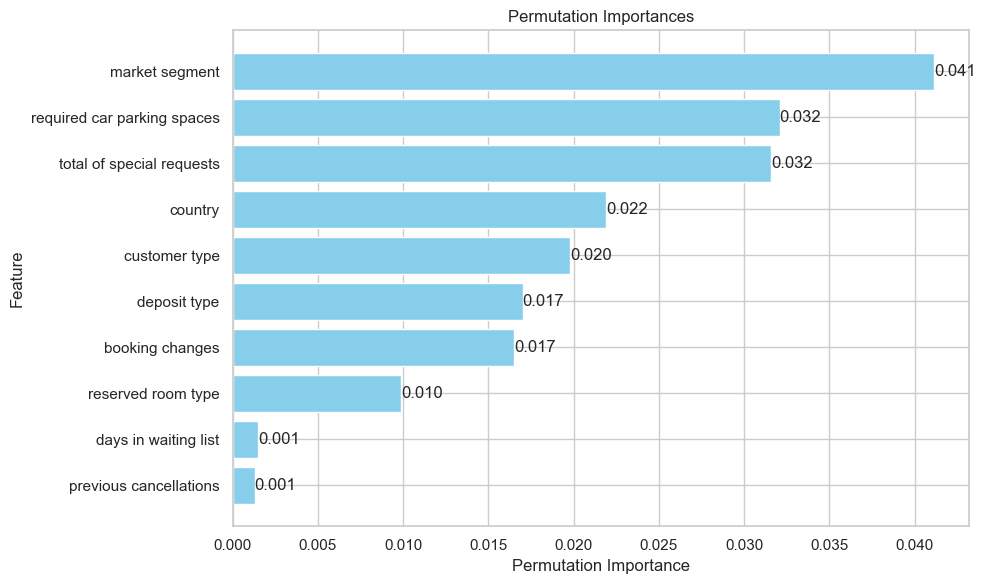

In [153]:
# Plot permutation importances
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_names, importances, color='skyblue')

# Annotate the bars with the permutation importance values
for bar in bars:
    plt.text(
        bar.get_width(),       # Get the width of the bar (which is the end of the bar)
        bar.get_y() + bar.get_height() / 2,  # Get the y coordinate plus half the height of the bar
        f'{bar.get_width():.3f}',  # The value to annotate with, formatted to 3 decimal places
        va='center'   # Center alignment for the vertical alignment
    )

plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Importances')
plt.tight_layout()  
plt.show()

In [154]:
df['market segment'].value_counts()

market segment
Online TA        4924
Direct           2079
Offline TA/TO    1469
Groups            845
Corporate         505
Complementary     180
Aviation           81
Name: count, dtype: int64

## **Insight**
 - Feature Importances merupakan item yang bertujuan untuk mengetahui fitur-fitur yang memiliki pengaruh signifikan terhadap target. Variabel yang menjadi target dalam penelitian ini adalah 'is canceled', sedangkan fitur selain 'is canceled' merupakan fitur yang berkontribusi terhadap target.
 - Jika dilihat pada plot maka fitur 'market segment' merupakan fitur yang paling berpengaruh terhadap target, yaitu 'is canceled'. Sehingga dapat disimpulkan bahwa dari market segment manakah seorang calon customer merupakan fitur yang paling berpengaruh untuk menentukkan apakah calon customer tersebut melakukan cancel booking atau tidak
 

In [155]:
import pickle
filename = 'Hotel_Booking_Demand_Final_model.sav'
pickle.dump(best_model, open(filename, 'wb'))